In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('HistoricalQuotes.csv')
#using data from nasdaq

In [4]:
df.columns = ['Date', 'Close_Last', 'Volume', 'Open', 'High', 'Low']
#rename column Close/Last to Close_Last so data type can be changed

# EDA

In [5]:
df.head()

,Date,Close_Last,Volume,Open,High,Low
0,11/13/2020,$23.43,46030700,$24.35,$24.78,$22.24
1,11/12/2020,$23.45,53551510,$22.85,$24.26,$21.93
2,11/11/2020,$23,59408070,$20.34,$23,$20.34
3,11/10/2020,$20.01,39513540,$21.19,$21.61,$19.03
4,11/09/2020,$20.31,56113970,$19.45,$21.89,$18.47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
Date          2517 non-null object
Close_Last    2517 non-null object
Volume        2517 non-null int64
Open          2517 non-null object
High          2517 non-null object
Low           2517 non-null object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
Date          2517 non-null object
Close_Last    2517 non-null object
Volume        2517 non-null int64
Open          2517 non-null object
High          2517 non-null object
Low           2517 non-null object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [8]:
#change data types for Close_Last, Open, High, Low from objec to float
df['Close_Last'] = df.Close_Last.str.replace('$', '').astype(float)
df['Open'] = df.Open.str.replace('$', '').astype(float)
df['High'] = df.High.str.replace('$', '').astype(float)
df['Low'] = df.Low.str.replace('$', '').astype(float)

In [9]:
df.head()

,Date,Close_Last,Volume,Open,High,Low
0,11/13/2020,23.43,46030700,24.35,24.78,22.24
1,11/12/2020,23.45,53551510,22.85,24.26,21.93
2,11/11/2020,23.00,59408070,20.34,23.00,20.34
3,11/10/2020,20.01,39513540,21.19,21.61,19.03
4,11/09/2020,20.31,56113970,19.45,21.89,18.47


In [10]:
df.describe()

,Close_Last,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,2.839682,6.692721e+06,2.848303,2.943022,2.743905
std,2.646206,1.388451e+07,2.639693,2.757008,2.522761
min,0.118000,3.534000e+03,0.120000,0.125000,0.115500
25%,1.640000,8.976550e+05,1.650000,1.690000,1.560000
50%,2.130000,2.677637e+06,2.130000,2.185000,2.070000
75%,3.060000,6.445770e+06,3.050000,3.140000,2.950000
max,23.450000,2.430012e+08,24.350000,24.780000,22.240000


<AxesSubplot:>

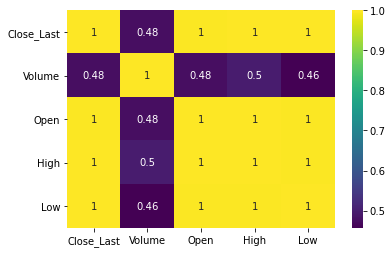

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
#some correlated features

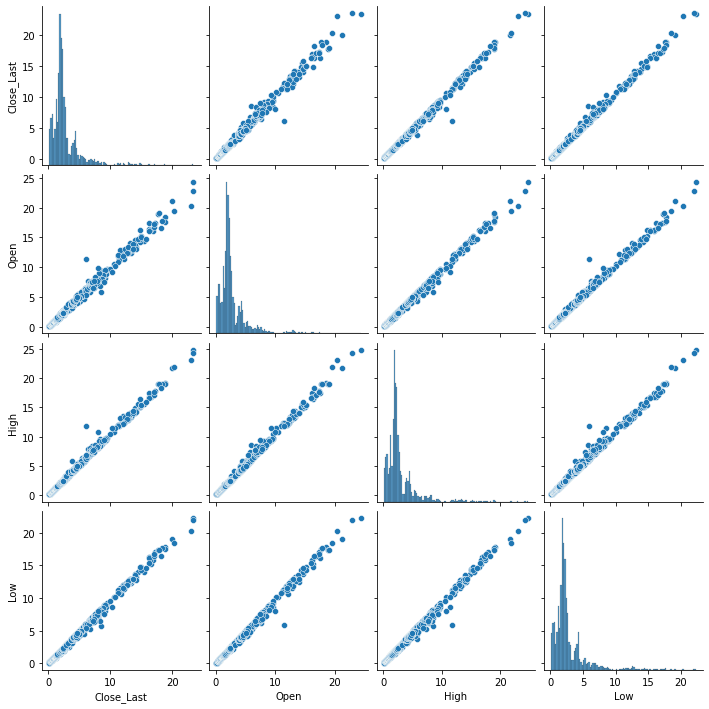

In [13]:
sns.pairplot(df[['Close_Last', 'Open', 'High', 'Low']])

In [17]:
#df = df.drop('Date', axis=1)
#df = df.drop('Volume', axis=1)

In [18]:
#nflx_df[‘Year’]=df[‘Date’].dt.year
#nflx_df[‘Month’]=df[‘Date’].dt.month
#nflx_df[‘Day’]=df[‘Date’].dt.day

# Setting Up the Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
X = df[['Close_Last', 'Open', 'Low']]
y = df['High']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = lm.predict(X_test)

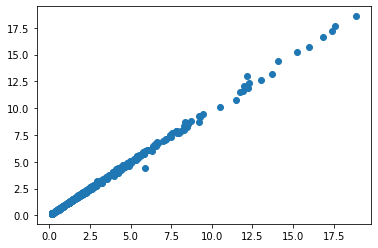

In [25]:
plt.scatter(y_test, predictions)

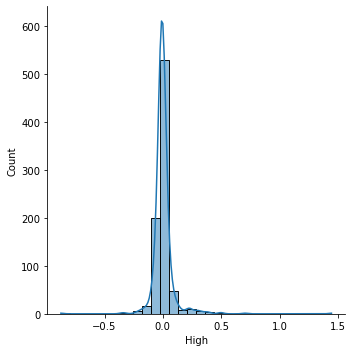

In [26]:
sns.displot((y_test-predictions),bins=30, kde=True);

# Evaluating the Models

In [27]:
#evaluate the metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.04257059091420603
MSE: 0.008995413148175372
RMSE: 0.09484415189233004


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.9983440333242802

In [29]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Close_Last,0.863881
Open,0.847439
Low,-0.701952


In [30]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20)
results_kfold = model_selection.cross_val_score(lm, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  97.36178575351711


### Stocks are extremely unpredictable, so this model is unrealistic (just for practice)